In [10]:
import nomad.io.base as loader
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx # for basemap
import nomad.stop_detection.viz as viz # Import nomad plotting functions

In [11]:
# Define S3 Paths
DEVICE_LEVEL_PATH = "s3://catalog-csslab/phl_synthetic_200/device_level/"
STOP_TABLES_PATH = "s3://catalog-csslab/phl_synthetic_200/stop_tables/ground_truth/"
POI_DATA_PATH = "s3://catalog-csslab/phl_synthetic_200/poi_data/osm_sample_phl_200/poi_gdf_phl_200.parquet"

In [12]:
# Load Data
device_df = loader.from_file(DEVICE_LEVEL_PATH, format="parquet")
stop_df = loader.from_file(STOP_TABLES_PATH, format="parquet")
poi_gdf = gpd.read_parquet(POI_DATA_PATH)

print("Device Level Columns:", device_df.columns.tolist())
print("Stop Tables Columns:", stop_df.columns.tolist())
print("POI Data Columns:", poi_gdf.columns.tolist())

C:\Users\franc\Desktop\Brain\Code Development\nomad\nomad\io\base.py:590: UserWarning: The 'datetime' column is timezone-naive. Consider localizing or using unix timestamps.
  warnings.warn(f"The '{col}' column is timezone-naive. Consider localizing or using unix timestamps.")
C:\Users\franc\Desktop\Brain\Code Development\nomad\nomad\io\base.py:590: UserWarning: The 'datetime' column is timezone-naive. Consider localizing or using unix timestamps.
  warnings.warn(f"The '{col}' column is timezone-naive. Consider localizing or using unix timestamps.")


Device Level Columns: ['x', 'y', 'datetime', 'timestamp', 'user_id', 'ha', 'tz_offset', 'admin_1_id', 'admin_2_id', 'event_start_date']
Stop Tables Columns: ['datetime', 'timestamp', 'duration', 'location', 'user_id', 'x', 'y', 'tz_offset', 'admin_1_id', 'admin_2_id', 'event_start_date']
POI Data Columns: ['osm_type', 'subtype', 'addr:street', 'addr:city', 'admin_2_id', 'addr:housenumber', 'geometry', 'admin_1_id', 'geometry_wkt']


In [ ]:
# Plot OSM Polygons by Category (COMMENTED OUT FOR DEBUGGING)
# fig, ax = plt.subplots(figsize=(15, 15))
# counts = poi_gdf['subtype'].value_counts()
# keep_cats = counts[counts > 50].index.tolist()
# poi_gdf['plot_cat'] = poi_gdf['subtype'].apply(lambda x: x if x in keep_cats else 'other')
# poi_gdf.plot(
#     column='plot_cat',
#     ax=ax, 
#     categorical=True,
#     legend=True,
#     cmap='tab10',
#     alpha=0.6, 
#     edgecolor='black', 
#     linewidth=0.5, 
#     legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left', 'title': 'POI Categories'}
# )
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# ax.set_title("Sample of POIs from Open Street Maps used for simulated data")
# ax.set_axis_off()
# plt.tight_layout()
# plt.show()

KeyError: 'longitude'

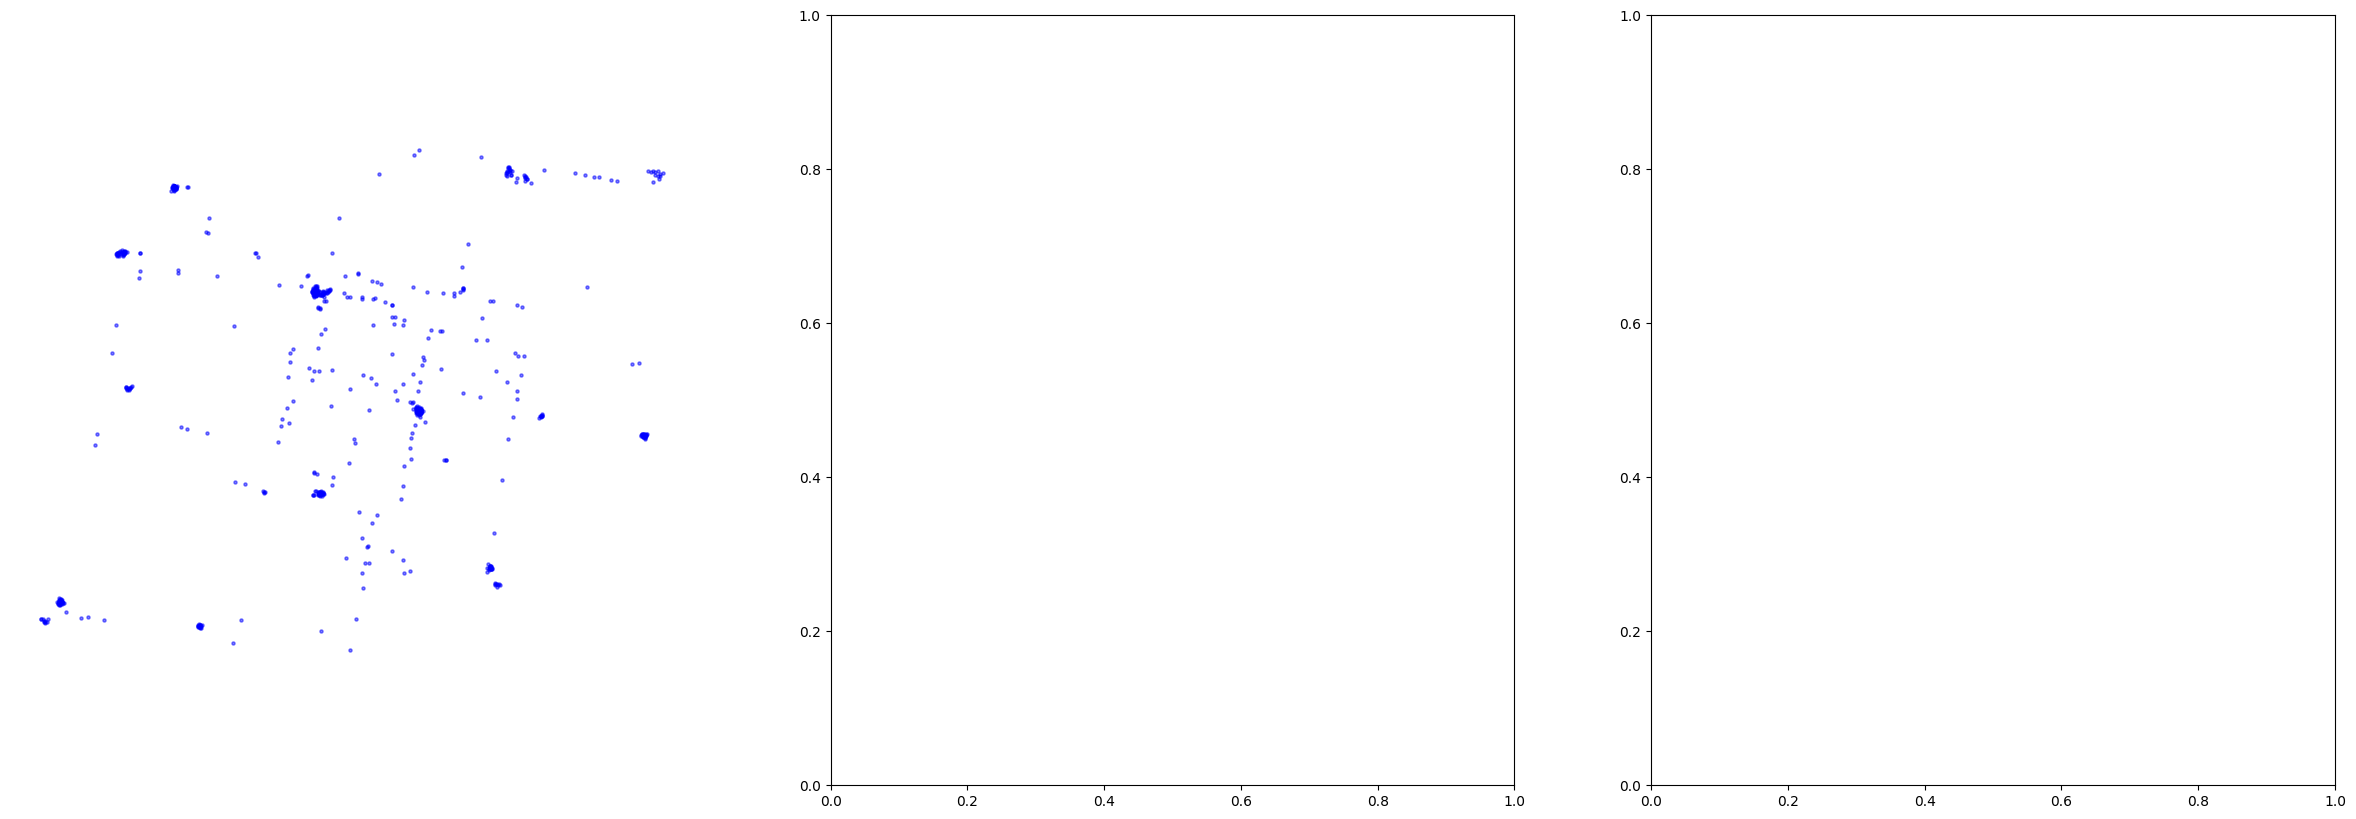

In [13]:
# Plot Trajectories and Stops for Selected Users
common_users = list(set(device_df['user_id']) & set(stop_df['user_id']))
selected_users = common_users[:3]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, user_id in enumerate(selected_users):
    ax = axes[i]
    
    user_pings = device_df[device_df['user_id'] == user_id].copy()
    user_stops = stop_df[stop_df['user_id'] == user_id].copy()
    
    user_stops['cluster'] = range(1, len(user_stops) + 1)
    
    viz.plot_pings(user_pings, ax, color='blue', s=5, alpha=0.5)
    viz.plot_stops(user_stops, ax, radius=20, cmap='Reds', traj_cols={'x': 'x', 'y': 'y'})
    
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    ax.set_title(f"User: {user_id}")
    ax.set_axis_off()

plt.tight_layout()
plt.show()